In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, wilcoxon
import plotly.express as px
import plotly.graph_objects as go
import nbformat

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib_venn import venn2
import os

In [337]:
df_cell_abundance = pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_bp_res_mid_lvl_ct_ct_fraction.csv")
df_cell_abundance['dcc_filename'] = df_cell_abundance['dcc_filename'].str.replace('-', '.', regex=False)
df_cell_abundance.head(3)

dcc_filename     tumor    Tcells    Bcells  Fibroblasts  \
0  DSP.1001660016606.G.A02.dcc  0.476461  0.009487  0.135361     0.231508   
1  DSP.1001660016606.G.A03.dcc  0.806981  0.013774  0.026948     0.064725   
2  DSP.1001660016606.G.A04.dcc  0.427201  0.009367  0.105530     0.250796   

    NKcells  Macrophages  Mast cells       DCs  other  Endothelial cells  Roi  \
0  0.018543     0.101739    0.001637  0.014749    NaN           0.010419    1   
1  0.012740     0.055951    0.001264  0.009905    NaN           0.007552    1   
2  0.012980     0.169353         NaN  0.018545    NaN           0.005558    2   

  Segment     Sample NACT_status Annotation_cell  Roi.1 Segment_geomx Patient  \
0  stroma  S053_post        post  posCD8_posIBA1    1.0           tsi    S053   
1   tumor  S053_post        post  posCD8_posIBA1    1.0           tsi    S053   
2  stroma  S053_post        post  posCD8_posIBA1    2.0           tsi    S053   

      Site  
0  Omentum  
1  Omentum  
2  Omentum

In [338]:
stromal_gene_expression=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_geomx_harmony_corr_expr_transpose.csv")


In [339]:
fibr_gene_expression_modified=pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/filtered_fibroblasts_gene_exp_transposed_w_clinical.csv")
fibr_gene_expression_modified['dcc_filename'] = fibr_gene_expression_modified['dcc_filename'].str.replace('-', '.', regex=False)

In [340]:
stromal_gene_expression = stromal_gene_expression.merge(df_cell_abundance[['dcc_filename', 'Segment','Sample']], on='dcc_filename', how='left')
stromal_gene_expression

dcc_filename       A2M     ACADM     ACADS     ACAT1  \
0    DSP.1001660016606.G.A02.dcc  6.804666  3.813770  3.094522  3.164409   
1    DSP.1001660016606.G.A03.dcc  6.260479  4.098920  2.754026  3.695262   
2    DSP.1001660016606.G.A04.dcc  6.558231  3.995816  3.354820  3.765523   
3    DSP.1001660016606.G.A05.dcc  6.372312  3.182476  2.866057  3.848748   
4    DSP.1001660016606.G.A06.dcc  7.417367  3.226799  2.810282  4.366523   
..                           ...       ...       ...       ...       ...   
499  DSP.1001660037247.C.D02.dcc  8.166184  5.241664  3.124489  3.526732   
500  DSP.1001660037247.C.D03.dcc  6.376363  5.552360  2.214444  5.236922   
501  DSP.1001660037247.C.D04.dcc  5.965432  4.531758  3.336801  4.182140   
502  DSP.1001660037247.C.D05.dcc  4.274683  4.829125  4.450223  5.702187   
503  DSP.1001660037247.C.D06.dcc  8.519846  4.297684  2.611660  3.425710   

       ACVRL1     PSEN1       ADA      SGCA     ADRB2  ...   SPATA21  \
0    3.379704  4.040574  2.899794  3.971268  1.660338  ...       NaN   
1    3.204526  4.713780  2.037078  3.807079  1.459433  ...       NaN   
2    2.918882  3.908741  3.160093  3.933863  2.369323  ...       NaN   
3    1.562825  4.439850  2.001105  4.093993  1.666247  ...       NaN   
4    3.352077  3.631273  2.465758  3.329628  1.619624  ...       NaN   
..        ...       ...       ...       ...       ...  ...       ...   
499  3.990766  4.529707  2.097933  3.164388  2.191627  ...  1.303624   
500  3.291828  5.162804  1.452677  2.908834  0.359455  ...  1.971167   
501  4.394296  2.165280  3.052810  0.851340  2.393427  ...  1.463408   
502  2.662740  5.174575  2.488751  3.088751  0.339813  ...  2.905090   
503  4.334616  5.403841  3.302788  3.315302  2.732738  ...  3.410152   

       SYCP2L     FGF10       IL3       IL5      MBL2      ARG1      CCL7  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
..        ...       ...       ...       ...       ...       ...       ...   
499  4.220623  3.404106  1.639313  0.528117  1.784708  1.268932  1.171722   
500  2.171534  1.837595  0.993433  2.067794  3.294537  0.338434  0.994699   
501  2.607464  3.337978  2.273930  4.099109  1.475635  1.923790  1.826580   
502  1.682048  2.462543  2.462948  0.763774  0.365711  2.561423  0.535245   
503  1.616437  3.276580  3.276985  0.568250  0.923731  1.381378  0.779602   

     Segment     Sample  
0     stroma  S053_post  
1      tumor  S053_post  
2     stroma  S053_post  
3      tumor  S053_post  
4     stroma  S053_post  
..       ...        ...  
499   stroma  S333_pOme  
500    tumor  S333_pOme  
501   stroma  S333_pOme  
502    tumor  S333_pOme  
503   stroma  S333_pOme  

[504 rows x 18359 columns]

In [341]:
tumor_gene_expression=stromal_gene_expression.loc[stromal_gene_expression['Segment']=="tumor"]
stromal_gene_expression=stromal_gene_expression.loc[stromal_gene_expression['Segment']=="stroma"]
tumor_gene_expression

dcc_filename       A2M     ACADM     ACADS     ACAT1  \
1    DSP.1001660016606.G.A03.dcc  6.260479  4.098920  2.754026  3.695262   
3    DSP.1001660016606.G.A05.dcc  6.372312  3.182476  2.866057  3.848748   
5    DSP.1001660016606.G.A07.dcc  4.270724  4.191617  2.438553  3.964941   
7    DSP.1001660016606.G.A09.dcc  5.700569  3.450182  3.066636  3.738675   
9    DSP.1001660016606.G.A11.dcc  4.994710  3.856643  2.890848  4.602470   
..                           ...       ...       ...       ...       ...   
494  DSP.1001660037247.C.C09.dcc  5.301583  5.577581  3.213030  3.998505   
496  DSP.1001660037247.C.C11.dcc  5.627609  5.353561  4.453114  4.823058   
497  DSP.1001660037247.C.C12.dcc  6.167466  5.530541  2.268609  4.883731   
500  DSP.1001660037247.C.D03.dcc  6.376363  5.552360  2.214444  5.236922   
502  DSP.1001660037247.C.D05.dcc  4.274683  4.829125  4.450223  5.702187   

       ACVRL1     PSEN1       ADA      SGCA     ADRB2  ...   SPATA21  \
1    3.204526  4.713780  2.037078  3.807079  1.459433  ...       NaN   
3    1.562825  4.439850  2.001105  4.093993  1.666247  ...       NaN   
5    1.450099  3.832948  3.422043  2.361022  2.032790  ...       NaN   
7    1.849683  3.785764  2.118696  3.445232  2.202347  ...       NaN   
9    1.124861  4.515451  2.696120  2.854496  0.711536  ...       NaN   
..        ...       ...       ...       ...       ...  ...       ...   
494  1.971948  5.093898  2.909434  3.403965  2.626625  ...  1.982937   
496  3.045114  4.346046  2.344090  2.940557  1.354566  ...  0.972823   
497  3.632745  5.426152  1.788226  2.308508  0.930296  ...  2.071589   
500  3.291828  5.162804  1.452677  2.908834  0.359455  ...  1.971167   
502  2.662740  5.174575  2.488751  3.088751  0.339813  ...  2.905090   

       SYCP2L     FGF10       IL3       IL5      MBL2      ARG1      CCL7  \
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
7         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
..        ...       ...       ...       ...       ...       ...       ...   
494  2.633807  2.080726  2.507128  1.319551  1.995164  1.450021  2.082397   
496  2.317645  3.383835  1.621967  2.213905  0.620824  1.333544  1.985376   
497  0.960271  2.716666  1.762423  2.655790  1.536566  1.296610  0.812064   
500  2.171534  1.837595  0.993433  2.067794  3.294537  0.338434  0.994699   
502  1.682048  2.462543  2.462948  0.763774  0.365711  2.561423  0.535245   

     Segment     Sample  
1      tumor  S053_post  
3      tumor  S053_post  
5      tumor  S053_post  
7      tumor  S053_post  
9      tumor  S053_post  
..       ...        ...  
494    tumor  S333_pOme  
496    tumor  S333_pOme  
497    tumor  S333_pOme  
500    tumor  S333_pOme  
502    tumor  S333_pOme  

[238 rows x 18359 columns]

Stromal stuff: bubble plots of immune cell abundance versus genes of interest expression

In [342]:
genes_of_interest_target=["TGFB1","TGFB2","TGFB3", "TGFBR1","TGFBR2","TGFBR3","IL6", "IL6R", "IL10RA","IL10RB", "CXCL8", "CXCL12", 
 "CCR2","CCR5", "CXCR2", "CXCR1", "CXCR4", "CXCL10","CXCL9","HGF", "MET", 
 "FGF1","FGF2","FGF7","FGF10", "FGFR1","FGFR2","FGFR3","FGFR4"]
all_genes_heatmap = stromal_gene_expression.groupby("Sample")[genes_of_interest_target].mean()

In [343]:
# Filter once for stroma
df_stroma = df_cell_abundance[df_cell_abundance["Segment"] == "stroma"]

# Group and calculate mean cell abundance per sample
df_tcell_abundance_mean       = df_stroma.groupby("Sample")["Tcells"].mean()
df_bcell_abundance_mean       = df_stroma.groupby("Sample")["Bcells"].mean()
df_nkcell_abundance_mean      = df_stroma.groupby("Sample")["NKcells"].mean()
df_macrophages_abundance_mean = df_stroma.groupby("Sample")["Macrophages"].mean()
df_mast_abundance_mean        = df_stroma.groupby("Sample")["Mast cells"].mean()
df_dcs_abundance_mean         = df_stroma.groupby("Sample")["DCs"].mean()
df_fibroblasts_abundance_mean = df_stroma.groupby("Sample")["Fibroblasts"].mean()




In [344]:
# Reset index to ensure 'Sample' is a column
df_tcell_abundance_mean = df_tcell_abundance_mean.reset_index()
df_bcell_abundance_mean = df_bcell_abundance_mean.reset_index()
df_nkcell_abundance_mean = df_nkcell_abundance_mean.reset_index()
df_macrophages_abundance_mean = df_macrophages_abundance_mean.reset_index()
df_mast_abundance_mean = df_mast_abundance_mean.reset_index()
df_dcs_abundance_mean = df_dcs_abundance_mean.reset_index()
df_fibroblasts_abundance_mean = df_fibroblasts_abundance_mean.reset_index()

# Merge with gene expression dataframe
merged_df_tcell = pd.merge(df_tcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_bcell = pd.merge(df_bcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_nkcell = pd.merge(df_nkcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_macrophages = pd.merge(df_macrophages_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_mast = pd.merge(df_mast_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_dcs = pd.merge(df_dcs_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_fibroblasts = pd.merge(df_fibroblasts_abundance_mean, all_genes_heatmap, on="Sample", how="left")


In [345]:
merged_df_tcell.head(10)

Sample    Tcells     TGFB1     TGFB2     TGFB3    TGFBR1    TGFBR2  \
0   S015_post  0.035728  5.377206  2.451800  4.314559  3.684068  5.461504   
1    S015_pre  0.014464  4.711575  2.746894  3.567685  3.777904  4.069187   
2   S027_post  0.034365  4.647523  1.360063  5.112772  3.081053  5.627126   
3    S027_pre  0.026960  5.487099  2.767071  2.975281  4.080457  5.428374   
4   S032_post  0.039059  5.568676  1.156626  4.511058  4.212810  6.032188   
5    S032_pre  0.036650  6.150475  3.130967  4.008386  3.875507  6.336310   
6   S053_post  0.024897  5.636193  2.622198  4.407341  4.286064  5.506708   
7   S057_post  0.021198  5.200239  2.303573  4.446061  3.305580  5.604646   
8   S065_post  0.039266  4.489423  2.824282  4.201341  3.042959  5.217414   
9  S069_iAdnL  0.045245  5.810510  2.417447  2.253341  3.675863  5.159369   

     TGFBR3       IL6      IL6R  ...       HGF       MET      FGF1      FGF2  \
0  2.650007  1.542924  3.426190  ...  2.626938  2.532622  2.330201  2.342110   
1  2.414909  1.843697  3.304216  ...  2.615917  2.288178  2.358227  2.052975   
2  3.576343  1.511194  5.240923  ...  3.440013  2.323787  2.406310  2.572381   
3  2.165508  1.510187  2.665972  ...  2.684092  2.456697  2.700656  2.119050   
4  2.397659  1.660818  3.154054  ...  3.030963  2.679538  2.264309  2.156608   
5  2.302475  1.401468  3.006504  ...  2.688091  1.900898  2.150073  2.187670   
6  2.654873  1.201641  3.301496  ...  2.831139  2.297773  2.560399  2.037055   
7  2.615160  1.377829  3.162315  ...  3.000581  2.187485  2.698984  1.898026   
8  2.888104  1.667986  3.099615  ...  3.062607  2.795073  2.888831  2.716852   
9  3.304732  2.508710  3.973262  ...  4.538367  3.106912  3.377521  3.574954   

       FGF7   FGF10     FGFR1     FGFR2     FGFR3     FGFR4  
0  2.472994     NaN  4.911030  2.323844  2.819389  3.741691  
1  2.651157     NaN  3.682333  3.235127  2.923940  4.421202  
2  2.503077     NaN  4.556391  1.440735  2.910568  6.040676  
3  2.244155     NaN  4.379749  2.943911  2.498669  1.456371  
4  2.714487     NaN  3.905149  2.645324  1.696512  2.232268  
5  2.555484     NaN  4.512363  2.719241  1.925155  3.475283  
6  1.391875     NaN  4.507058  3.698535  2.262008  3.121302  
7  2.138193     NaN  4.219482  3.311511  2.465129  3.252427  
8  2.214733     NaN  4.558378  3.645320  2.365165  3.656534  
9  2.926291  3.9404  2.837479  2.894342  3.224863  3.255036  

[10 rows x 31 columns]

In [346]:
# Only select numeric data
numeric_df = merged_df_tcell.select_dtypes(include='number')

# Find overall min and max values
overall_min = numeric_df.min().min()
overall_max = numeric_df.max().max()

print(f"Minimum value: {overall_min}")
print(f"Maximum value: {overall_max}")


Minimum value: 0.0144639085302191
Maximum value: 7.847121421327165


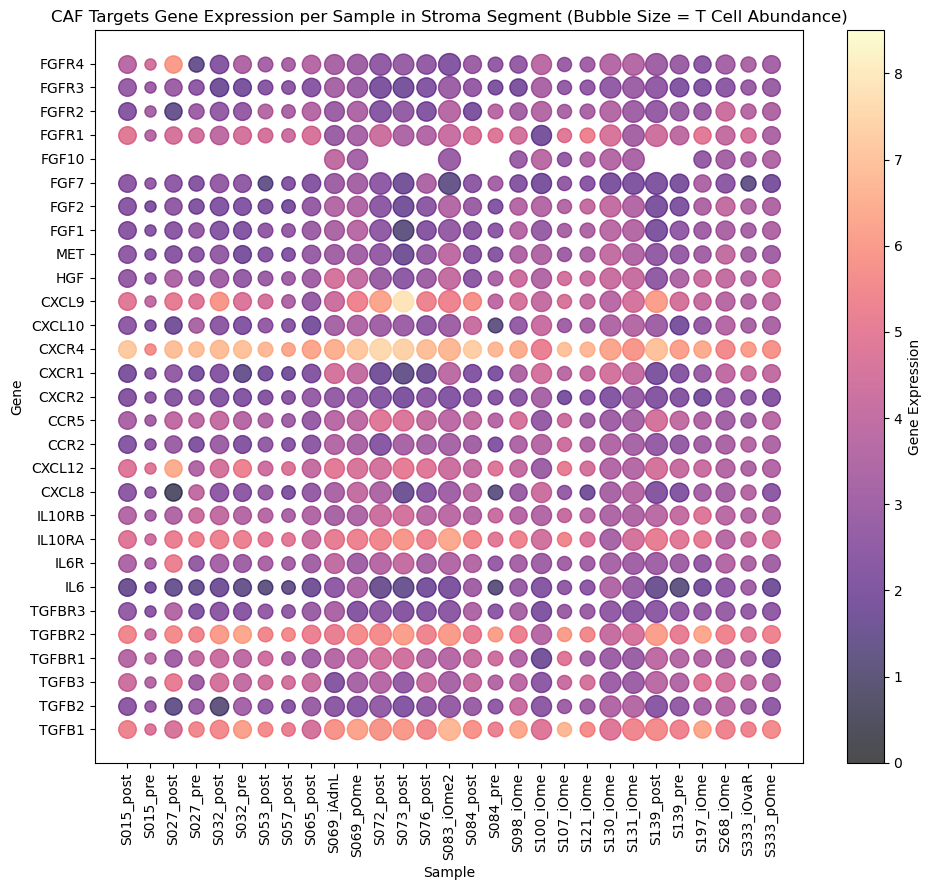

In [347]:
plt.figure(figsize=(10, 9))

samples = merged_df_tcell['Sample'].unique()
genes = genes_of_interest_target  # Ensure this list is already defined

for gene in genes:
    for sample in samples:
        row = merged_df_tcell[merged_df_tcell['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        t_cells = row['Tcells'].values[0] if 'Tcells' in row else np.nan

        if pd.isna(expression) or pd.isna(t_cells):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=t_cells * 4500,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stroma Segment (Bubble Size = T Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


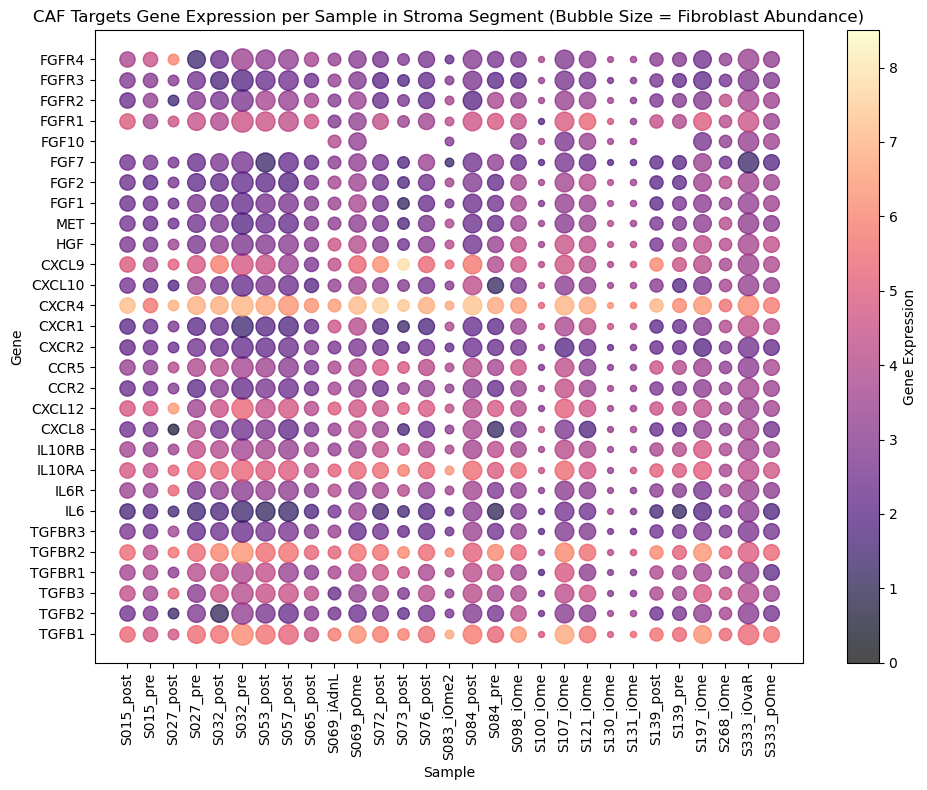

In [348]:

plt.figure(figsize=(10, 8))

samples = merged_df_fibroblasts['Sample'].unique()
genes = genes_of_interest_target

for gene in genes:
    for sample in samples:
        row = merged_df_fibroblasts[merged_df_fibroblasts['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        fibroblasts = row['Fibroblasts'].values[0] if 'Fibroblasts' in row else np.nan

        # Skip if either value is NaN
        if pd.isna(expression) or pd.isna(fibroblasts):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=fibroblasts * 750,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stroma Segment (Bubble Size = Fibroblast Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


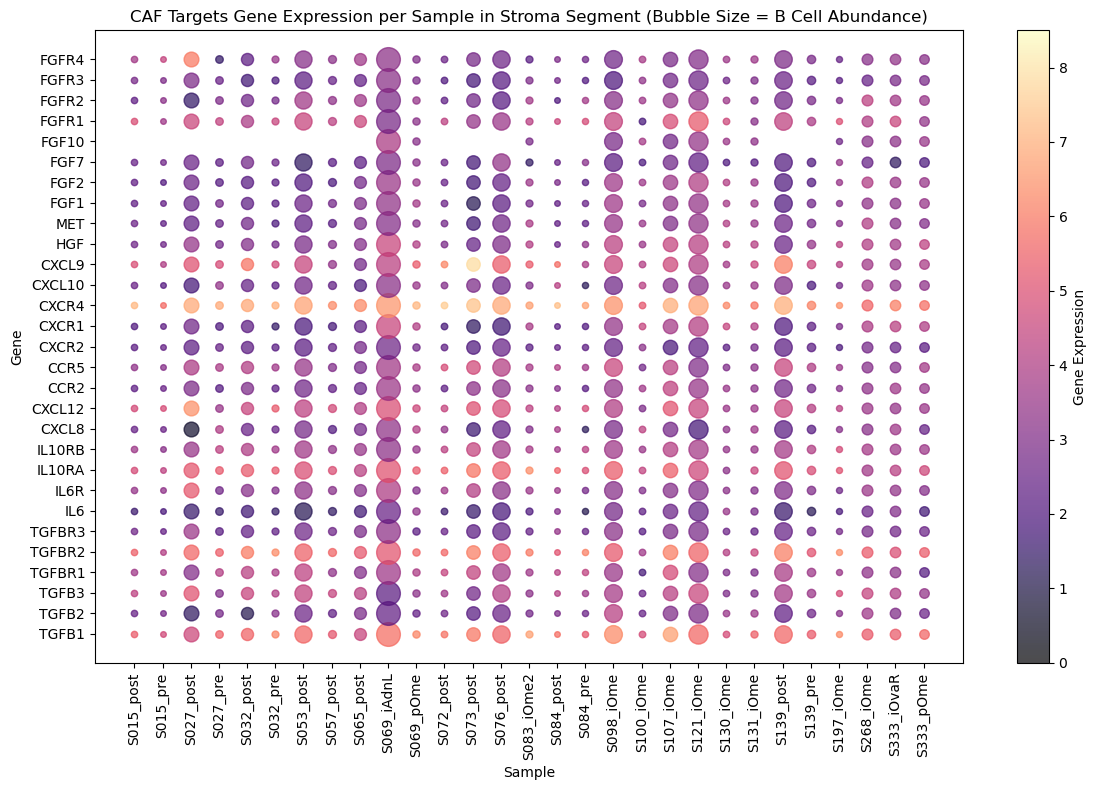

In [349]:
plt.figure(figsize=(12, 8))

samples = merged_df_bcell['Sample'].unique()
genes = genes_of_interest_target  # Make sure this list is defined

for gene in genes:
    for sample in samples:
        row = merged_df_bcell[merged_df_bcell['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        b_cells = row['Bcells'].values[0] if 'Bcells' in row else np.nan

        if pd.isna(expression) or pd.isna(b_cells):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=b_cells * 2500,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stroma Segment (Bubble Size = B Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


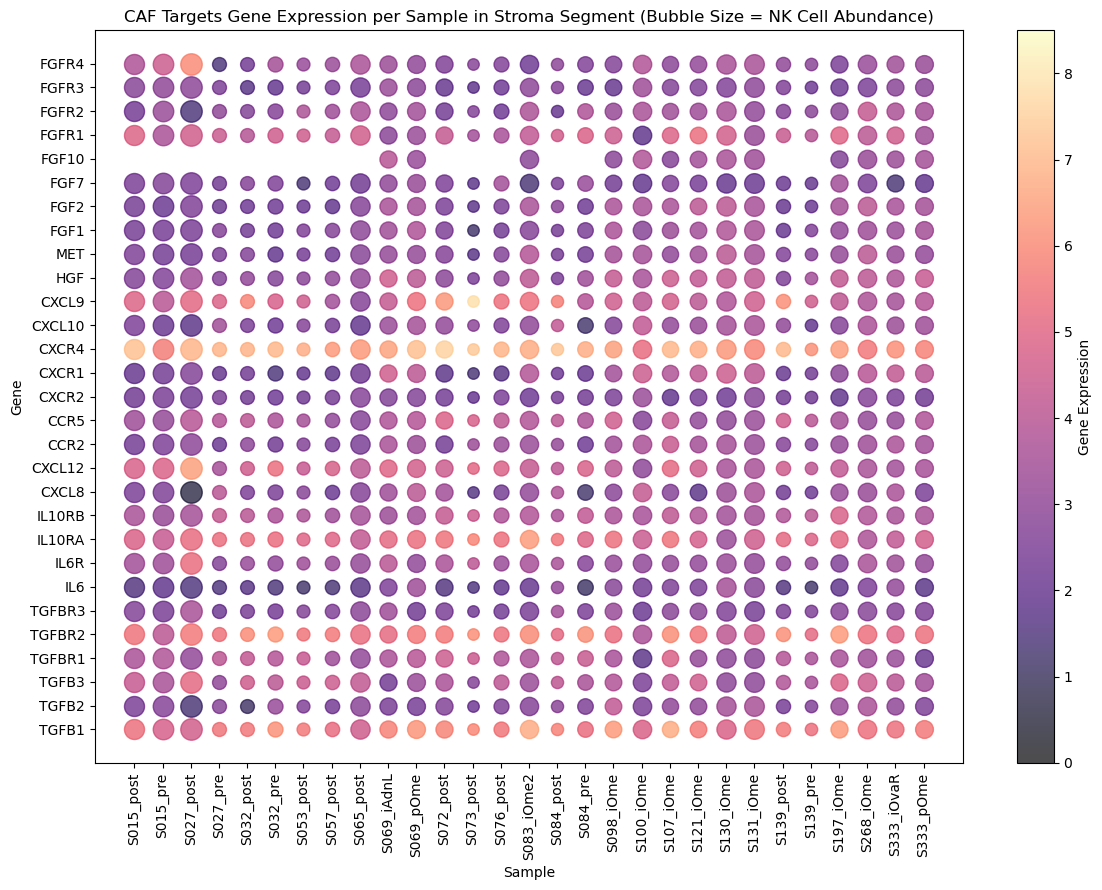

In [350]:
plt.figure(figsize=(12, 9))

samples = merged_df_nkcell['Sample'].unique()
genes = genes_of_interest_target  # Ensure this is defined

for gene in genes:
    for sample in samples:
        row = merged_df_nkcell[merged_df_nkcell['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        nk_cells = row['NKcells'].values[0] if 'NKcells' in row else np.nan

        if pd.isna(expression) or pd.isna(nk_cells):
            continue
        plt.scatter(
            x=sample,
            y=gene,
            s=nk_cells * 5000,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stroma Segment (Bubble Size = NK Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


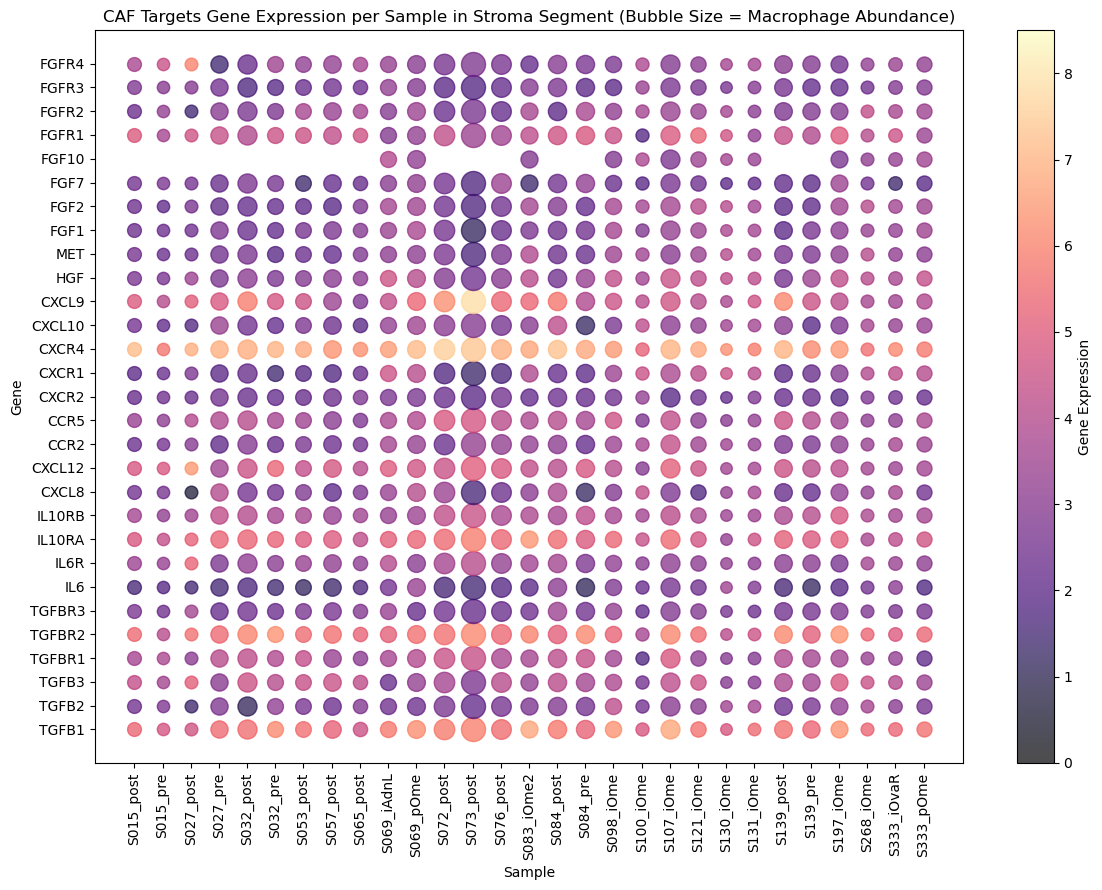

In [351]:
plt.figure(figsize=(12, 9))

samples = merged_df_macrophages['Sample'].unique()
genes = genes_of_interest_target  # Make sure this list is defined

for gene in genes:
    for sample in samples:
        row = merged_df_macrophages[merged_df_macrophages['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        macrophages = row['Macrophages'].values[0] if 'Macrophages' in row else np.nan

        if pd.isna(expression) or pd.isna(macrophages):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=macrophages * 900,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stroma Segment (Bubble Size = Macrophage Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()



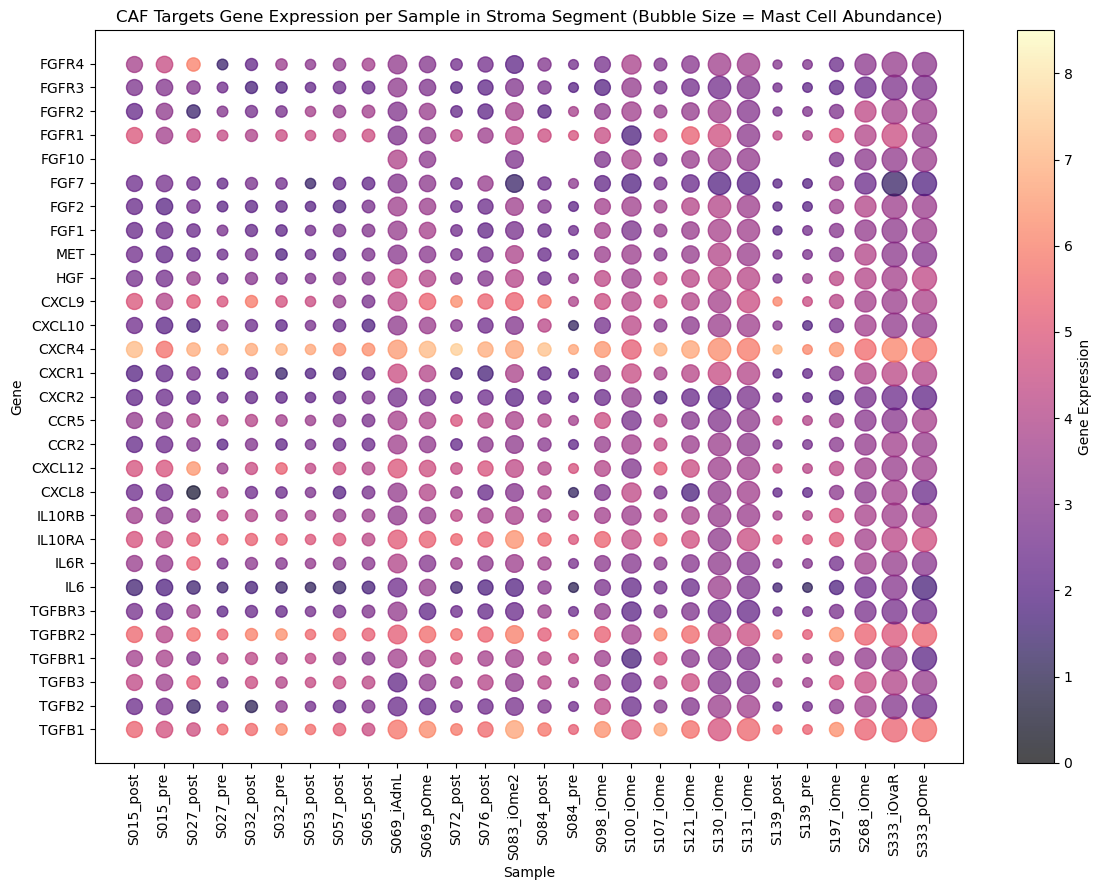

In [352]:
plt.figure(figsize=(12, 9))

samples = merged_df_mast['Sample'].unique()
genes = genes_of_interest_target  # Ensure this list is defined

for gene in genes:
    for sample in samples:
        row = merged_df_mast[merged_df_mast['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        mast_cells = row['Mast cells'].values[0] if 'Mast cells' in row else np.nan

        if pd.isna(expression) or pd.isna(mast_cells):
            continue
        plt.scatter(
            x=sample,
            y=gene,
            s=mast_cells * 55000,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stroma Segment (Bubble Size = Mast Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


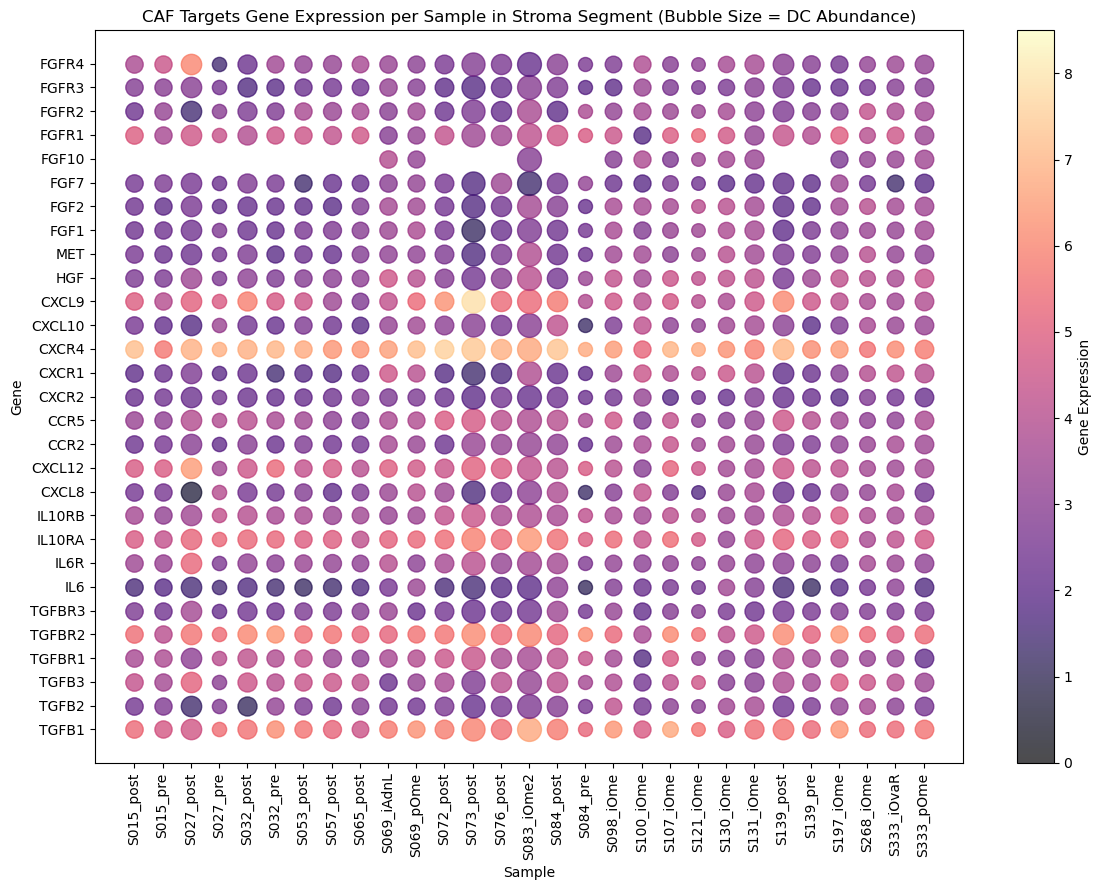

In [353]:
plt.figure(figsize=(12, 9))

samples = merged_df_dcs['Sample'].unique()
genes = genes_of_interest_target  # Make sure this list is defined

for gene in genes:
    for sample in samples:
        row = merged_df_dcs[merged_df_dcs['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        dcs = row['DCs'].values[0] if 'DCs' in row else np.nan

        if pd.isna(expression) or pd.isna(dcs):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=dcs * 5500,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=8.5,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Stroma Segment (Bubble Size = DC Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()



Tumor stuff 

In [354]:
genes_of_interest_target=["TGFB1","TGFB2","TGFB3", "TGFBR1","TGFBR2","TGFBR3","IL6", "IL6R", "IL10RA","IL10RB", "CXCL8", "CXCL12", 
 "CCR2","CCR5", "CXCR2", "CXCR1", "CXCR4", "CXCL10","CXCL9","HGF", "MET", 
 "FGF1","FGF2","FGF7","FGF10", "FGFR1","FGFR2","FGFR3","FGFR4"]

all_genes_heatmap = tumor_gene_expression.groupby("Sample")[genes_of_interest_target].mean()

In [355]:
# Filter once for stroma
df_tumor = df_cell_abundance[df_cell_abundance["Segment"] == "tumor"]

# Group and calculate mean cell abundance per sample
df_tcell_abundance_mean       = df_tumor.groupby("Sample")["Tcells"].mean()
df_bcell_abundance_mean       = df_tumor.groupby("Sample")["Bcells"].mean()
df_nkcell_abundance_mean      = df_tumor.groupby("Sample")["NKcells"].mean()
df_macrophages_abundance_mean = df_tumor.groupby("Sample")["Macrophages"].mean()
df_mast_abundance_mean        = df_tumor.groupby("Sample")["Mast cells"].mean()
df_dcs_abundance_mean         = df_tumor.groupby("Sample")["DCs"].mean()
df_fibroblasts_abundance_mean = df_tumor.groupby("Sample")["Fibroblasts"].mean()

In [356]:
# Reset index to ensure 'Sample' is a column
df_tcell_abundance_mean = df_tcell_abundance_mean.reset_index()
df_bcell_abundance_mean = df_bcell_abundance_mean.reset_index()
df_nkcell_abundance_mean = df_nkcell_abundance_mean.reset_index()
df_macrophages_abundance_mean = df_macrophages_abundance_mean.reset_index()
df_mast_abundance_mean = df_mast_abundance_mean.reset_index()
df_dcs_abundance_mean = df_dcs_abundance_mean.reset_index()
df_fibroblasts_abundance_mean = df_fibroblasts_abundance_mean.reset_index()

# Merge with gene expression dataframe
merged_df_tcell = pd.merge(df_tcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_bcell = pd.merge(df_bcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_nkcell = pd.merge(df_nkcell_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_macrophages = pd.merge(df_macrophages_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_mast = pd.merge(df_mast_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_dcs = pd.merge(df_dcs_abundance_mean, all_genes_heatmap, on="Sample", how="left")
merged_df_fibroblasts = pd.merge(df_fibroblasts_abundance_mean, all_genes_heatmap, on="Sample", how="left")


In [357]:
merged_df_tcell.head(10)

Sample    Tcells     TGFB1     TGFB2     TGFB3    TGFBR1    TGFBR2  \
0   S015_post  0.015800  3.803309  2.781978  2.845381  3.234169  6.123010   
1    S015_pre  0.014480  3.185616  2.361909  2.563706  3.021681  4.822035   
2   S027_post  0.008583  3.646654  1.825813  3.562760  2.805402  5.340812   
3    S027_pre  0.007198  4.190937  4.306717  1.953235  3.470049  4.784263   
4   S032_post  0.016248  3.326339  2.773367  2.463171  3.129175  4.317670   
5    S032_pre  0.011784  2.883245  4.757729  1.903515  2.885349  3.985854   
6   S053_post  0.007309  3.105989  2.178859  2.355691  3.437028  5.312703   
7   S057_post  0.006695  3.554842  3.162780  2.484988  2.559588  5.933696   
8   S065_post  0.014834  3.525653  2.496383  2.950389  2.745372  4.333018   
9  S069_iAdnL  0.034565  2.641533  2.410001  2.059277  2.149298  3.162329   

     TGFBR3       IL6      IL6R  ...       HGF       MET      FGF1      FGF2  \
0  3.352505  1.358469  3.613545  ...  1.931353  3.951461  1.973681  1.538400   
1  2.573480  1.686457  3.294309  ...  2.438915  2.867428  1.896865  1.726460   
2  2.492636  1.389373  3.703391  ...  2.008029  3.273815  1.730945  1.935047   
3  2.646130  1.639319  1.825332  ...  1.434408  3.659571  1.247125  1.093968   
4  2.577492  1.440207  3.382392  ...  2.127071  3.951103  2.017463  1.276905   
5  2.953521  1.311930  3.678733  ...  1.466068  3.058849  1.646461  1.567613   
6  3.602878  1.322484  4.123946  ...  2.090518  2.147845  1.449702  1.089098   
7  3.018794  1.385626  3.035988  ...  2.014659  2.510462  1.782574  1.845556   
8  3.004259  1.496032  2.737172  ...  2.728336  3.837933  2.235201  1.784593   
9  3.270646  2.673712  4.185789  ...  4.216793  3.208490  2.448495  3.179148   

       FGF7     FGF10     FGFR1     FGFR2     FGFR3     FGFR4  
0  1.291757       NaN  3.860027  3.931971  2.071953  2.507802  
1  1.171387       NaN  2.498745  3.443892  2.592814  3.593199  
2  1.962873       NaN  3.089481  4.116472  2.128210  5.004483  
3  0.887440       NaN  3.460463  3.888191  2.688533  1.936654  
4  1.200343       NaN  3.607951  3.095062  3.313898  2.482752  
5  0.946832       NaN  4.230766  3.475979  4.840614  3.641788  
6  1.001591       NaN  5.106974  4.746670  3.576430  3.084017  
7  1.427253       NaN  2.973448  4.456774  3.506256  3.048692  
8  1.285190       NaN  3.979570  2.896580  3.882400  3.146975  
9  1.530656  4.352595  6.746436  3.666524  3.216090  3.468824  

[10 rows x 31 columns]

In [358]:
# Only select numeric data
numeric_df = merged_df_tcell.select_dtypes(include='number')

# Find overall min and max values
overall_min = numeric_df.min().min()
overall_max = numeric_df.max().max()

print(f"Minimum value: {overall_min}")
print(f"Maximum value: {overall_max}")

Minimum value: 0.00669501418768396
Maximum value: 7.170921409294983


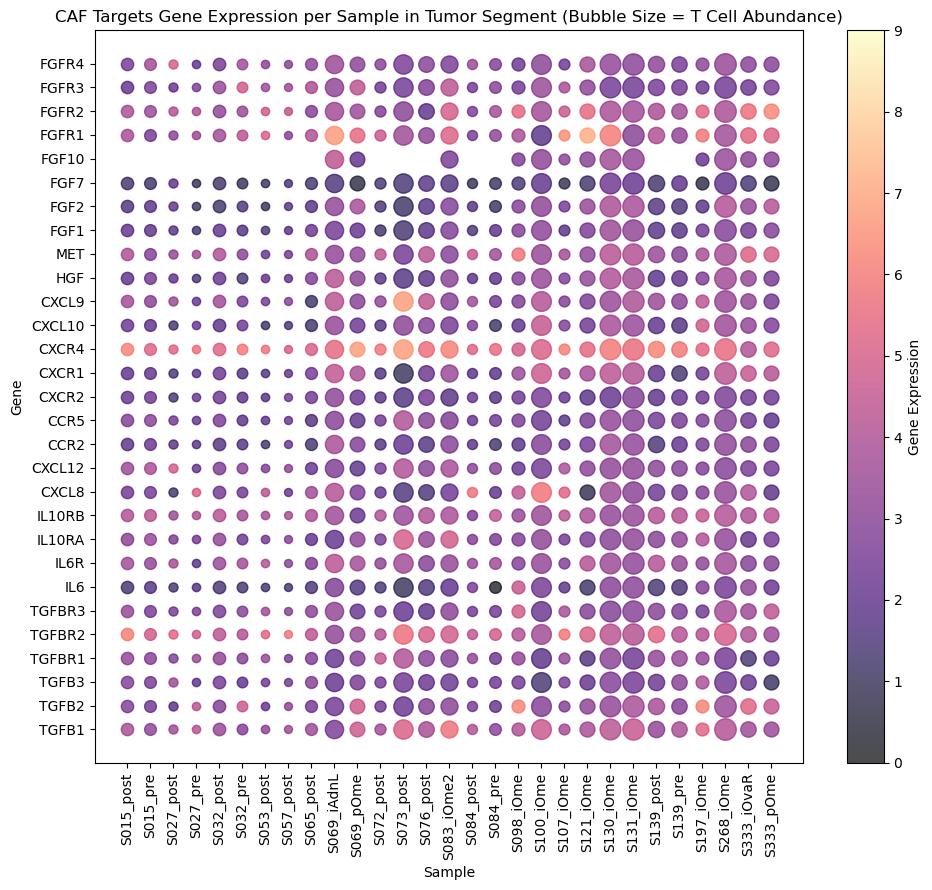

In [359]:
plt.figure(figsize=(10, 9))

samples = merged_df_tcell['Sample'].unique()
genes = genes_of_interest_target  # Ensure this list is already defined

for gene in genes:
    for sample in samples:
        row = merged_df_tcell[merged_df_tcell['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        t_cells = row['Tcells'].values[0] if 'Tcells' in row else np.nan

        if pd.isna(expression) or pd.isna(t_cells):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=t_cells * 5000,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = T Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

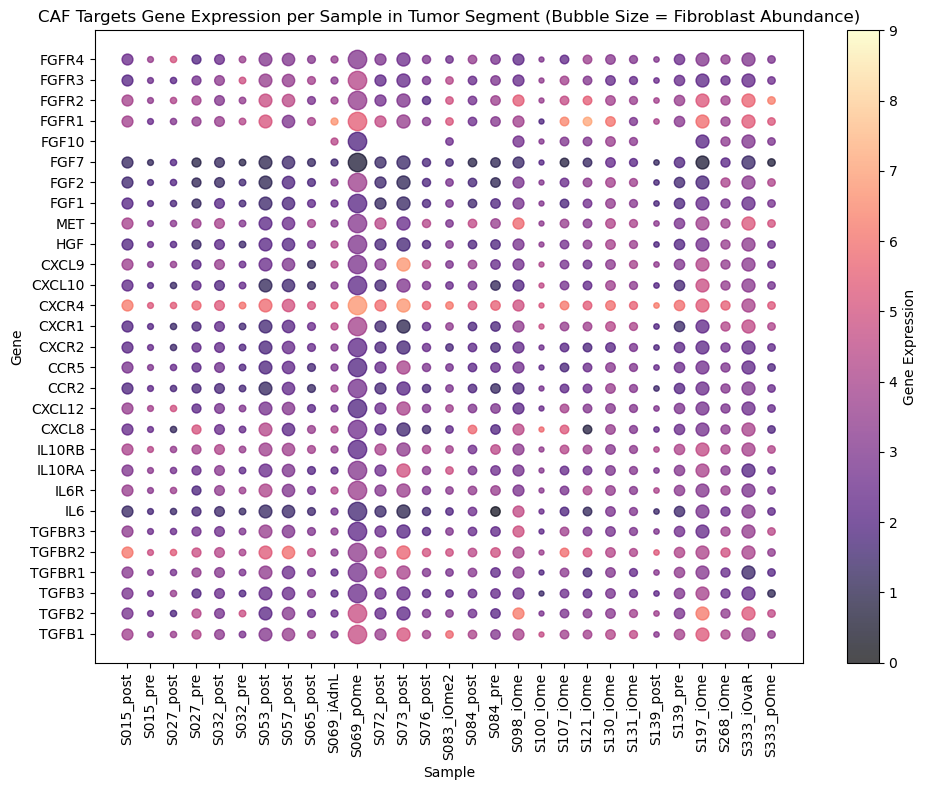

In [360]:
plt.figure(figsize=(10, 8))

samples = merged_df_fibroblasts['Sample'].unique()
genes = genes_of_interest_target

for gene in genes:
    for sample in samples:
        row = merged_df_fibroblasts[merged_df_fibroblasts['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        fibroblasts = row['Fibroblasts'].values[0] if 'Fibroblasts' in row else np.nan

        # Skip if either value is NaN
        if pd.isna(expression) or pd.isna(fibroblasts):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=fibroblasts * 2700,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = Fibroblast Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


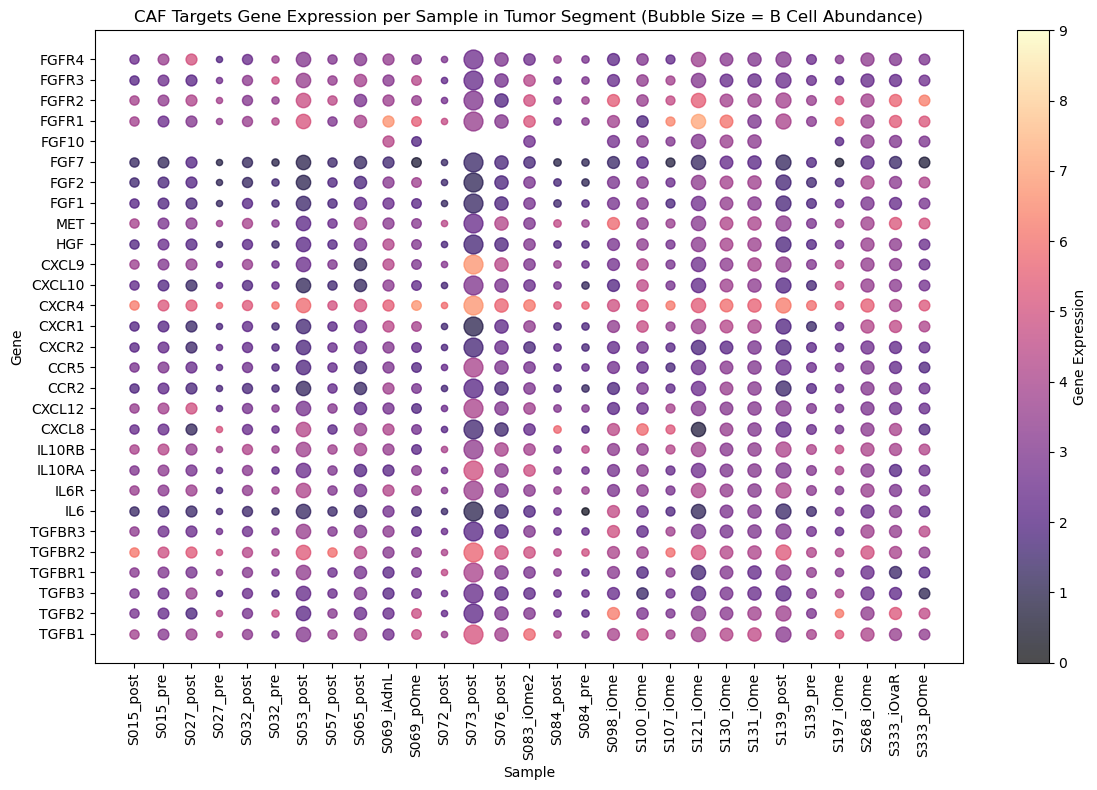

In [361]:
plt.figure(figsize=(12, 8))

samples = merged_df_bcell['Sample'].unique()
genes = genes_of_interest_target  # Make sure this list is defined

for gene in genes:
    for sample in samples:
        row = merged_df_bcell[merged_df_bcell['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        b_cells = row['Bcells'].values[0] if 'Bcells' in row else np.nan

        if pd.isna(expression) or pd.isna(b_cells):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=b_cells * 10000,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = B Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

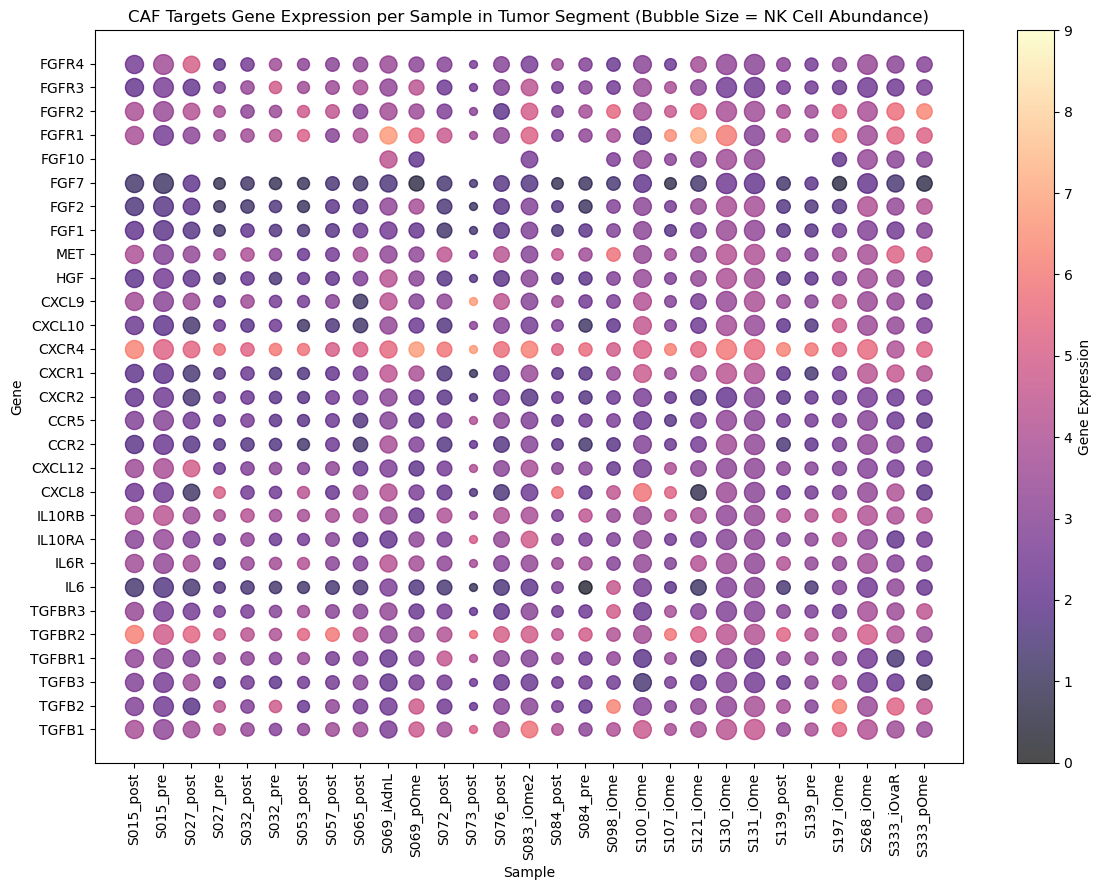

In [362]:
plt.figure(figsize=(12, 9))

samples = merged_df_nkcell['Sample'].unique()
genes = genes_of_interest_target  # Ensure this is defined

for gene in genes:
    for sample in samples:
        row = merged_df_nkcell[merged_df_nkcell['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        nk_cells = row['NKcells'].values[0] if 'NKcells' in row else np.nan

        if pd.isna(expression) or pd.isna(nk_cells):
            continue
        plt.scatter(
            x=sample,
            y=gene,
            s=nk_cells * 5400,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = NK Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()


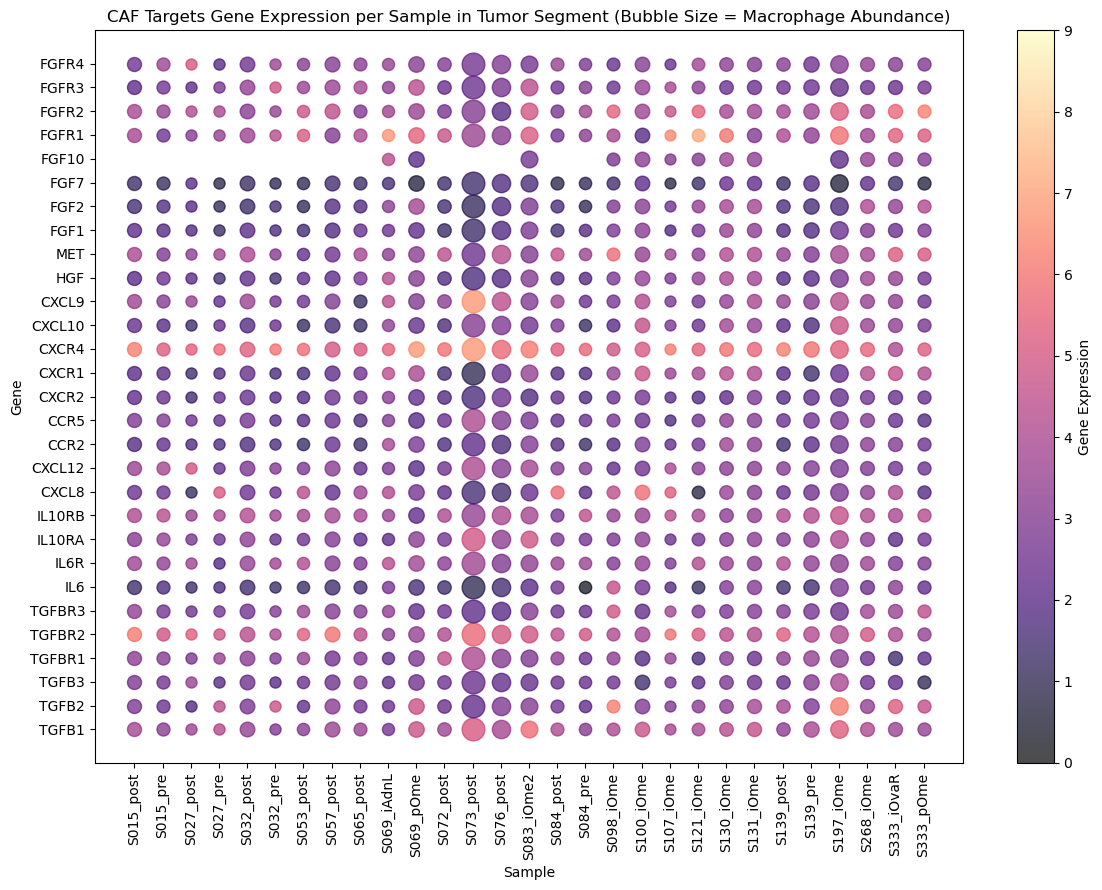

In [363]:
plt.figure(figsize=(12, 9))

samples = merged_df_macrophages['Sample'].unique()
genes = genes_of_interest_target  # Make sure this list is defined

for gene in genes:
    for sample in samples:
        row = merged_df_macrophages[merged_df_macrophages['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        macrophages = row['Macrophages'].values[0] if 'Macrophages' in row else np.nan

        if pd.isna(expression) or pd.isna(macrophages):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=macrophages * 1500,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = Macrophage Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

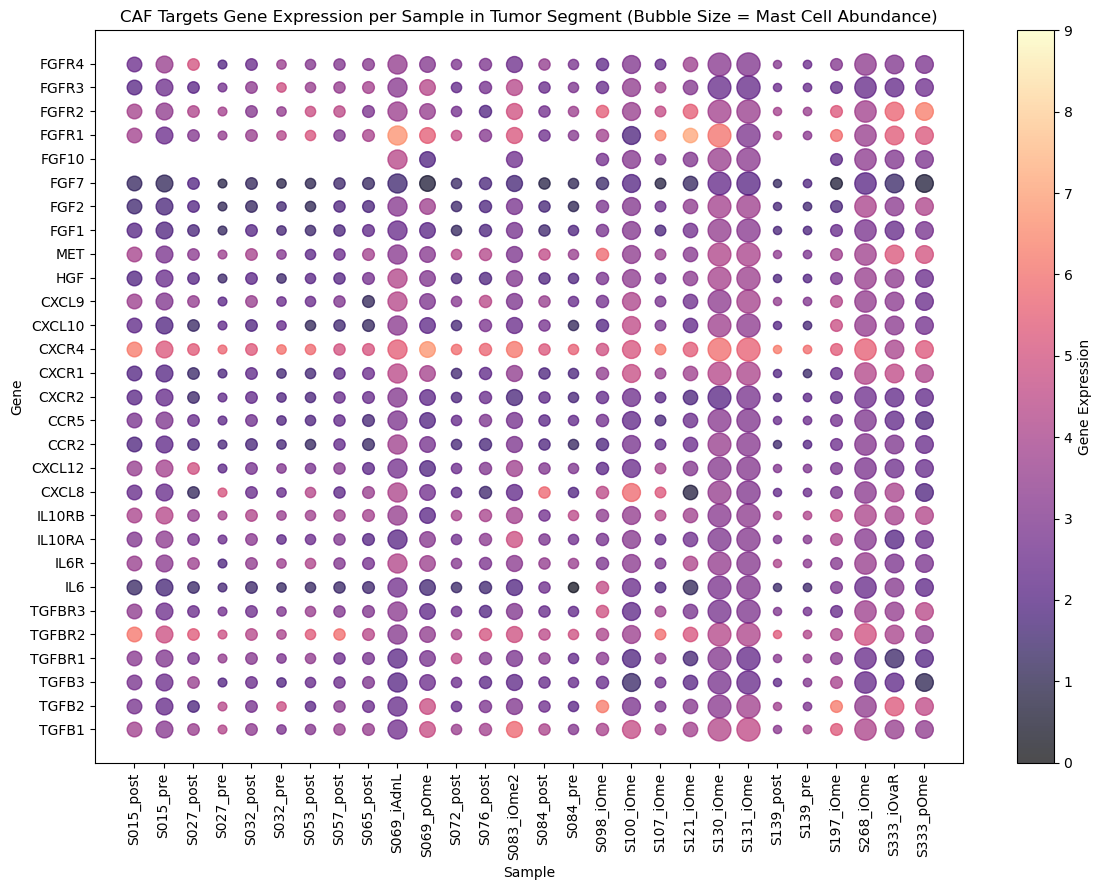

In [364]:
plt.figure(figsize=(12, 9))

samples = merged_df_mast['Sample'].unique()
genes = genes_of_interest_target  # Ensure this list is defined

for gene in genes:
    for sample in samples:
        row = merged_df_mast[merged_df_mast['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        mast_cells = row['Mast cells'].values[0] if 'Mast cells' in row else np.nan

        if pd.isna(expression) or pd.isna(mast_cells):
            continue
        plt.scatter(
            x=sample,
            y=gene,
            s=mast_cells * 60000,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = Mast Cell Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

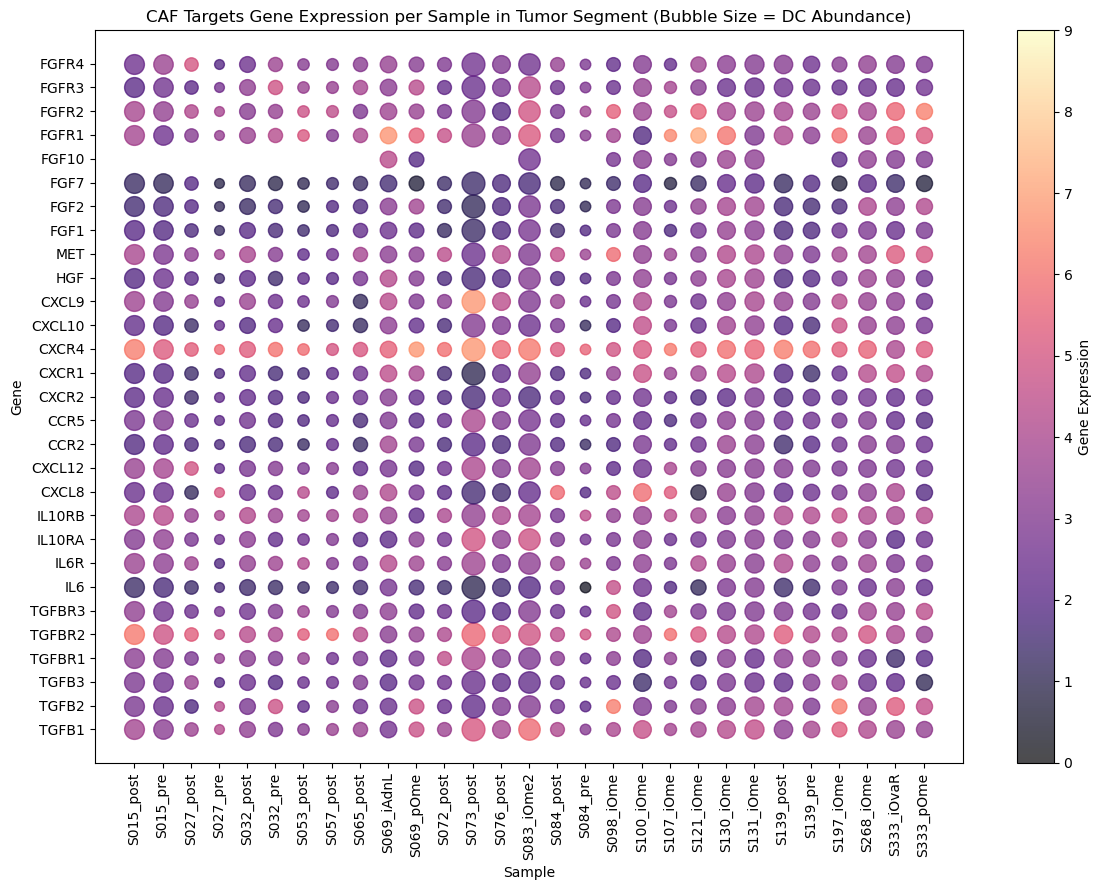

In [365]:
plt.figure(figsize=(12, 9))

samples = merged_df_dcs['Sample'].unique()
genes = genes_of_interest_target  # Make sure this list is defined

for gene in genes:
    for sample in samples:
        row = merged_df_dcs[merged_df_dcs['Sample'] == sample]

        if row.empty:
            continue

        expression = row[gene].values[0] if gene in row else np.nan
        dcs = row['DCs'].values[0] if 'DCs' in row else np.nan

        if pd.isna(expression) or pd.isna(dcs):
            continue

        plt.scatter(
            x=sample,
            y=gene,
            s=dcs * 7000,
            c=expression,
            cmap='magma',
            vmin=0,
            vmax=9,
            alpha=0.7
        )

plt.xticks(rotation=90)
plt.xlabel("Sample")
plt.ylabel("Gene")
plt.title("CAF Targets Gene Expression per Sample in Tumor Segment (Bubble Size = DC Abundance)")
plt.colorbar(label="Gene Expression")
plt.tight_layout()
plt.show()

In [366]:
# Only select numeric data
numeric_df = merged_df_tcell.select_dtypes(include='number')

# Find overall min and max values
overall_min = numeric_df.min().min()
overall_max = numeric_df.max().max()

print(f"Minimum value: {overall_min}")
print(f"Maximum value: {overall_max}")

Minimum value: 0.00669501418768396
Maximum value: 7.170921409294983
